In [1]:
import math
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = ["SimSun"]
plt.rcParams['axes.unicode_minus'] = False
import numpy as np

missile_starts = [
    np.array([20000, 0, 2000]),
    np.array([19000, 600, 2100]),
    np.array([18000, -600, 1900])
]

drone_pos = {
    0: np.array([17800,0,1800]),
    1: np.array([12000,1400,1400]),
    2: np.array([6000,-3000,700]),
    3: np.array([11000,2000,1800]),
    4: np.array([13000,-2000,1300])
}

In [ ]:
from calc_cover_time import *
from scipy.optimize import dual_annealing
from tqdm.notebook import tqdm

# 假设 drone_pos 是你的无人机位置字典，M1 是导弹初始点
missile_trajs = [get_missile_traj(missile_starts[i], fake_target, v_M1, t_list) for i in range(3)]


for idx in range(5):
    f_pos = drone_pos[idx]
    cover_time_hist = []

    def sa_objective(x):
        try:
            speed = x[0]
            direction_angle = x[1]
            throw_times = x[2:5]
            burst_delays = x[5:8]
            smoke_centers = get_smoke_center_multi(f_pos, direction_angle, speed, throw_times, burst_delays, t_list)
            cover_time = get_missile_cover_time_multi(smoke_centers, missile_trajs[0], true_target, smoke_R, t_list)
            cover_time_hist.append(cover_time)
            return -cover_time
        except Exception:
            return 1e6

    bounds = [
        (70, 140),           # speed
        ((0, 2*np.pi)),        # angle
        (0, 20), (1, 30), (2, 50),   # throw_times
        (0, 20), (1, 20), (2, 20),   # burst_delays
    ]
    max_iter = 6000
    pbar = tqdm(total=max_iter, desc=f"无人机{idx+1}退火优化进度")

    def progress_callback(x, f, context):
        pbar.update(1)

    result = dual_annealing(sa_objective,
                            bounds, 
                            maxiter=max_iter, 
                            seed=42,
                            callback=progress_callback,
                            initial_temp=20000,
                           )
    print(f"无人机{idx+1}最优参数:", result.x)
    smoke_centers = get_smoke_center_multi(f_pos, result.x[1], result.x[0], result.x[2:5], result.x[5:8], t_list)
    cover_time = get_missile_cover_time_multi(smoke_centers, missile_trajs[0], true_target, smoke_R, t_list, debug=True)
    pbar.close()

无人机1退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机1最优参数: [139.99656527   3.13899936   2.07213241   4.83095872   6.19326852
   4.84463745   5.79207848   6.16484225]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 3.70s下面是各区间：    区间: 6.92s ~ 10.62s
第2个烟雾球遮挡时间: 1.73s下面是各区间：    区间: 10.62s ~ 12.35s
第3个烟雾球遮挡时间: 0.81s下面是各区间：    区间: 12.36s ~ 13.16s

总遮挡区间：
    6.92s ~ 10.62s
    10.62s ~ 12.35s
    12.36s ~ 13.16s
总遮挡时间: 6.24s


无人机2退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机2最优参数: [129.64012875   4.55977233   4.182089    24.04985378  44.52492513
   6.40607977   4.87409011  16.55807789]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 4.68s下面是各区间：    区间: 14.28s ~ 18.96s
第2个烟雾球遮挡时间: 0.00s下面是各区间：第3个烟雾球遮挡时间: 0.00s下面是各区间：
总遮挡区间：
    14.28s ~ 18.96s
总遮挡时间: 4.68s


无人机3退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机3最优参数: [136.10423986   1.85487349   8.20822146  17.79368766  35.07498839
   8.93171863   6.05155103   3.72884019]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 0.00s下面是各区间：第2个烟雾球遮挡时间: 5.54s下面是各区间：    区间: 23.86s ~ 29.40s
第3个烟雾球遮挡时间: 0.00s下面是各区间：
总遮挡区间：
    23.86s ~ 29.40s
总遮挡时间: 5.54s


无人机4退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机4最优参数: [111.81651118   4.3610336    1.69195048   6.1067628   32.60299085
  11.40139012  12.47033729  18.23988351]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 0.00s下面是各区间：第2个烟雾球遮挡时间: 4.57s下面是各区间：    区间: 18.81s ~ 23.38s
第3个烟雾球遮挡时间: 0.00s下面是各区间：
总遮挡区间：
    18.81s ~ 23.38s
总遮挡时间: 4.57s


无人机5退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机5最优参数: [120.61864159   2.1767804    8.89409822  15.22072115  46.68895047
  14.7778023    5.20895291   8.55883093]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 0.00s下面是各区间：第2个烟雾球遮挡时间: 4.10s下面是各区间：    区间: 20.44s ~ 24.54s
第3个烟雾球遮挡时间: 0.00s下面是各区间：
总遮挡区间：
    20.44s ~ 24.54s
总遮挡时间: 4.10s


In [ ]:
from calc_cover_time import *
from scipy.optimize import dual_annealing
from tqdm.notebook import tqdm

# 假设 drone_pos 是你的无人机位置字典，M1 是导弹初始点
missile_trajs = [get_missile_traj(missile_starts[i], fake_target, v_M1, t_list) for i in range(3)]


for idx in range(5):
    f_pos = drone_pos[idx]
    cover_time_hist = []

    def sa_objective(x):
        try:
            speed = x[0]
            direction_angle = x[1]
            throw_times = x[2:5]
            burst_delays = x[5:8]
            smoke_centers = get_smoke_center_multi(f_pos, direction_angle, speed, throw_times, burst_delays, t_list)
            cover_time = get_missile_cover_time_multi(smoke_centers, missile_trajs[1], true_target, smoke_R, t_list)
            cover_time_hist.append(cover_time)
            return -cover_time
        except Exception:
            return 1e6

    bounds = [
        (70, 140),           # speed
        ((0, 2*np.pi)),        # angle
        (0, 20), (1, 30), (2, 50),   # throw_times
        (0, 20), (1, 20), (2, 20),   # burst_delays
    ]
    max_iter = 6000
    pbar = tqdm(total=max_iter, desc=f"无人机{idx+1}退火优化进度")

    def progress_callback(x, f, context):
        pbar.update(1)

    result = dual_annealing(sa_objective,
                            bounds, 
                            maxiter=max_iter, 
                            seed=42,
                            callback=progress_callback,
                            initial_temp=20000,
                           )
    print(f"无人机{idx+1}最优参数:", result.x)
    smoke_centers = get_smoke_center_multi(f_pos, result.x[1], result.x[0], result.x[2:5], result.x[5:8], t_list)
    cover_time = get_missile_cover_time_multi(smoke_centers, missile_trajs[1], true_target, smoke_R, t_list, debug=True)
    pbar.close()

无人机1退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机1最优参数: [99.986197    2.021499   16.35107039 18.80047616 22.87107773 16.50207341
  1.48577163 17.3595593 ]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 0.00s下面是各区间：第2个烟雾球遮挡时间: 0.00s下面是各区间：第3个烟雾球遮挡时间: 0.00s下面是各区间：
总遮挡区间：
总遮挡时间: 0.00s


无人机2退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机2最优参数: [107.97070753   4.66575043   5.24645531   6.63062286  26.1953878
   3.81279653   2.76225579  15.05254636]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 4.79s下面是各区间：    区间: 9.06s ~ 13.84s
第2个烟雾球遮挡时间: 3.30s下面是各区间：    区间: 20.35s ~ 23.64s
第3个烟雾球遮挡时间: 0.00s下面是各区间：
总遮挡区间：
    9.06s ~ 13.84s
    20.35s ~ 23.64s
总遮挡时间: 8.09s


无人机3退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机3最优参数: [114.30417314   1.76524646  10.01240143  24.58533915  45.58454033
   5.95730895   4.46325624   3.16988935]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 0.00s下面是各区间：第2个烟雾球遮挡时间: 4.41s下面是各区间：    区间: 29.27s ~ 33.68s
第3个烟雾球遮挡时间: 0.00s下面是各区间：
总遮挡区间：
    29.27s ~ 33.68s
总遮挡时间: 4.41s


无人机4退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机4最优参数: [137.82597691   4.05832668   2.86630832  14.07273215  29.39572167
  12.06809365  10.64461117  11.83191772]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 4.75s下面是各区间：    区间: 14.95s ~ 19.70s
第2个烟雾球遮挡时间: 0.00s下面是各区间：第3个烟雾球遮挡时间: 0.00s下面是各区间：
总遮挡区间：
    14.95s ~ 19.70s
总遮挡时间: 4.75s


无人机5退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机5最优参数: [99.986197    2.021499   16.35107039 18.80047616 22.87107773 16.50207341
  1.48577163 17.3595593 ]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 0.00s下面是各区间：第2个烟雾球遮挡时间: 0.00s下面是各区间：第3个烟雾球遮挡时间: 0.00s下面是各区间：
总遮挡区间：
总遮挡时间: 0.00s


In [4]:
from calc_cover_time import *
from scipy.optimize import dual_annealing
from tqdm.notebook import tqdm

# 假设 drone_pos 是你的无人机位置字典，M1 是导弹初始点
missile_trajs = [get_missile_traj(missile_starts[i], fake_target, v_M1, t_list) for i in range(3)]


for idx in range(5):
    f_pos = drone_pos[idx]
    cover_time_hist = []

    def sa_objective(x):
        try:
            speed = x[0]
            direction_angle = x[1]
            throw_times = x[2:5]
            burst_delays = x[5:8]
            smoke_centers = get_smoke_center_multi(f_pos, direction_angle, speed, throw_times, burst_delays, t_list)
            cover_time = get_missile_cover_time_multi(smoke_centers, missile_trajs[2], true_target, smoke_R, t_list)
            cover_time_hist.append(cover_time)
            return -cover_time
        except Exception:
            return 1e6

    bounds = [
        (70, 140),           # speed
        ((0, 2*np.pi)),        # angle
        (0, 20), (1, 30), (2, 50),   # throw_times
        (0, 20), (1, 20), (2, 20),   # burst_delays
    ]
    max_iter = 6000
    pbar = tqdm(total=max_iter, desc=f"无人机{idx+1}退火优化进度")

    def progress_callback(x, f, context):
        pbar.update(1)

    result = dual_annealing(sa_objective,
                            bounds, 
                            maxiter=max_iter, 
                            seed=42,
                            callback=progress_callback,
                            initial_temp=20000,
                           )
    print(f"无人机{idx+1}最优参数:", result.x)
    smoke_centers = get_smoke_center_multi(f_pos, result.x[1], result.x[0], result.x[2:5], result.x[5:8], t_list)
    cover_time = get_missile_cover_time_multi(smoke_centers, missile_trajs[2], true_target, smoke_R, t_list, debug=True)
    pbar.close()

无人机1退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机1最优参数: [99.986197    2.021499   16.35107039 18.80047616 22.87107773 16.50207341
  1.48577163 17.3595593 ]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 0.00s下面是各区间：第2个烟雾球遮挡时间: 0.00s下面是各区间：第3个烟雾球遮挡时间: 0.00s下面是各区间：
总遮挡区间：
总遮挡时间: 0.00s


无人机2退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机2最优参数: [121.236549     4.50001855   9.07599168  12.87371196  39.60772554
   5.83208772   4.91093736  18.54474222]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 3.98s下面是各区间：    区间: 14.92s ~ 18.89s
第2个烟雾球遮挡时间: 0.00s下面是各区间：第3个烟雾球遮挡时间: 0.00s下面是各区间：
总遮挡区间：
    14.92s ~ 18.89s
总遮挡时间: 3.98s


无人机3退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

无人机3最优参数: [137.91483222   2.10591455  12.27188406  18.02757665  37.31181133
   1.34304993   7.02258893  19.48334713]
每个烟雾球的遮挡时间及区间：
第1个烟雾球遮挡时间: 0.00s下面是各区间：第2个烟雾球遮挡时间: 5.07s下面是各区间：    区间: 25.06s ~ 30.13s
第3个烟雾球遮挡时间: 0.00s下面是各区间：
总遮挡区间：
    25.06s ~ 30.13s
总遮挡时间: 5.07s


无人机4退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

KeyboardInterrupt: 

退火优化进度:   0%|          | 0/6000 [00:00<?, ?it/s]

以下为第4架无人机的结果
最优参数: [131.16146278   3.84587365   6.82893035   9.14260319  18.51400682
  12.70768467  13.69426155   7.19783572]
最大遮挡总时间: 8.956
导弹1遮蔽情况：
  第1个烟雾球遮蔽时间: 0.00s 区间：  第2个烟雾球遮蔽时间: 4.52s 区间：    22.84s ~ 27.36s
  第3个烟雾球遮蔽时间: 0.00s 区间：导弹1总遮蔽区间：
    22.84s ~ 27.36s
导弹1总遮蔽时间: 4.52s
导弹2遮蔽情况：
  第1个烟雾球遮蔽时间: 4.44s 区间：    19.55s ~ 23.98s
  第2个烟雾球遮蔽时间: 0.00s 区间：  第3个烟雾球遮蔽时间: 0.00s 区间：导弹2总遮蔽区间：
    19.55s ~ 23.98s
导弹2总遮蔽时间: 4.44s
导弹3遮蔽情况：
  第1个烟雾球遮蔽时间: 0.00s 区间：  第2个烟雾球遮蔽时间: 0.00s 区间：  第3个烟雾球遮蔽时间: 0.00s 区间：导弹3总遮蔽区间：
导弹3总遮蔽时间: 0.00s
所有导弹被遮蔽时间总和: 8.96s


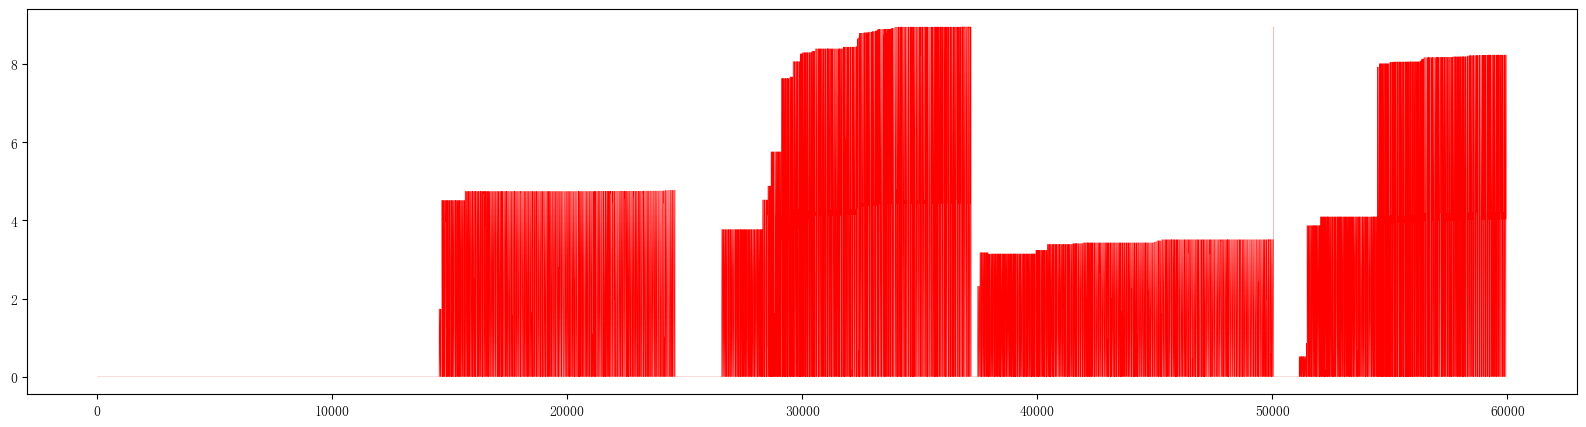

In [14]:
from calc_cover_time import *
from scipy.optimize import dual_annealing
bounds = [
    (130,140),  (np.pi/2,np.pi*3/2),  (0,13.87), (1,13.87), (2, 13.87),     (0,18.97),(0,18.97),(0,18.97),    #第一架飞机的参数限制
    (70,140),   (np.pi, np.pi*2),     (0, 50),   (1,50),    (2,50),         (0,16.74),(0, 16.74),(0, 16.74),    #第二架飞机的参数限制
    (70,140),   (0,np.pi),            (0,60),    (1,60),    (2,60),         (0, 11.9),(0, 11.9),(0, 11.9),    #第三架飞机的参数限制
    (70,140),   (np.pi, np.pi*2),     (0, 56),   (0, 56),   (0, 56),        (0, 18.97),(0, 18.97),(0, 18.97),    #第四架飞机的参数限制
    (70,140),   (0, np.pi),           (0, 43.7), (1, 43.7), (2, 43.7),      (0,16.12),(0,16.12),(0,16.12),    #第五架飞机的参数限制
]
cover_time_hist = []
idx = 3
missile_trajs = [get_missile_traj(missile_starts[i], fake_target, v_M1, t_list) for i in range(3)]
# 优化目标函数
def sa_objective_multi(x):
    try:
        speed = x[0]
        direction_angle = x[1]
        throw_times = x[2:5]
        burst_delays = x[5:8]
        smoke_centers = get_smoke_center_multi(drone_pos[idx], direction_angle, speed, throw_times, burst_delays, t_list)
        cover_time = get_missile_cover_time_multi_bomb_and_missile(smoke_centers, missile_trajs, true_target, smoke_R, t_list)
        cover_time_hist.append(cover_time)
        return -cover_time
    except AssertionError:
        return 1e6  # 参数非法时返回极小值

# 参数边界：[速度, 角度, 投弹1, 投弹2, 投弹3, 爆炸1, 爆炸2, 爆炸3]
bounds = bounds[idx]

from tqdm.notebook import tqdm
max_iter = 6000
pbar = tqdm(total=max_iter, desc="退火优化进度")

def progress_callback(x, f, context):
    pbar.update(1)

result = dual_annealing(
    sa_objective_multi,
    bounds,
    maxiter=max_iter,
    seed=42,
    callback=progress_callback,
    initial_temp=20000,
)
print(f"以下为第{idx+1}架无人机的结果")
print("最优参数:", result.x)
print("最大遮挡总时间:", -result.fun)

pbar.close()

# 调试get_missile_cover_time_multi_bomb_and_missile
smoke_centers01 = get_smoke_center_multi(drone_pos[idx], result.x[1], result.x[0], result.x[2:5], result.x[5:8], t_list)
get_missile_cover_time_multi_bomb_and_missile(smoke_centers01, missile_trajs, true_target, smoke_R, t_list, debug=True)
plt.figure(figsize=(20, 5))

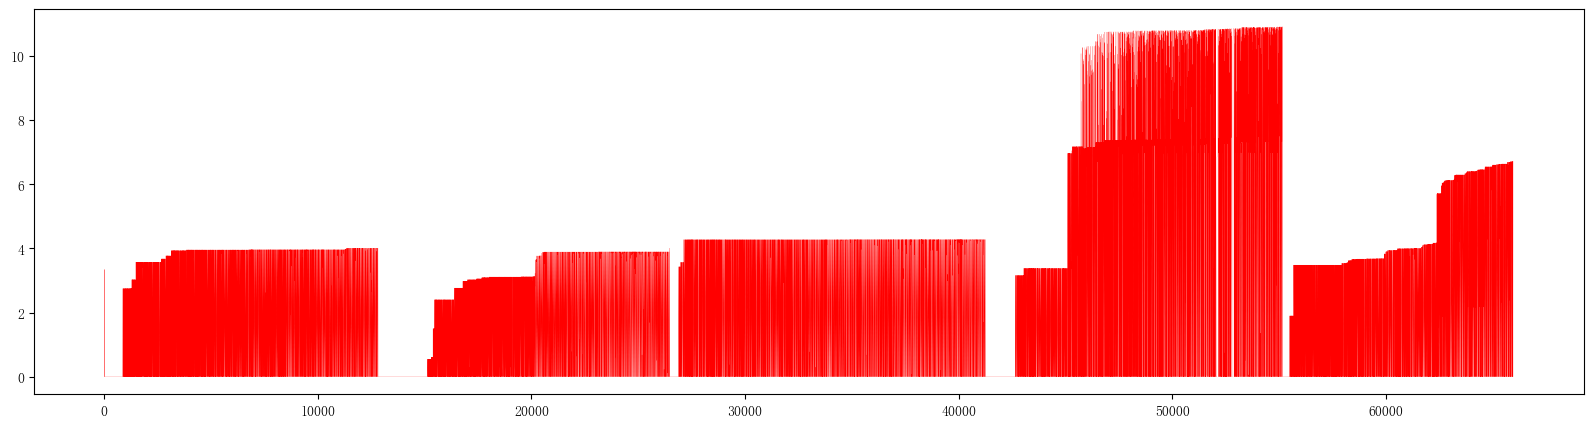